In [1]:
import glob
import numpy
import pandas
import pickle

In [2]:
with open('../Data/allplayerFantasyGameLogs.pickle', 'rb') as handle:
    games = pickle.load(handle)

In [3]:
games.head()

,GAME_DATE,SEASON_ID,Player_ID,Game_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,DouBL,TriBL,FanPTs,fullName,position1,Team,OpponentTeam,HomeGame
0,2015-10-27,22015,101126,0021500003,NOP @ GSW,L,19,0,1,0.000,...,0,-21,False,False,6.50,Nate Robinson,PG,NOP,GSW,0
1,2015-10-27,22015,202389,0021500002,CLE @ CHI,L,21,2,6,0.333,...,5,-1,False,False,16.75,Timofey Mozgov,C,CLE,CHI,0
2,2015-10-27,22015,202087,0021500003,NOP @ GSW,L,27,4,5,0.800,...,8,-8,False,False,20.25,Alonzo Gee,SF,NOP,GSW,0
3,2015-10-27,22015,2581,0021500001,DET @ ATL,W,16,1,6,0.167,...,3,-14,False,False,10.00,Steve Blake,PG,DET,ATL,0
4,2015-10-27,22015,202710,0021500002,CHI vs. CLE,W,37,6,14,0.429,...,17,3,False,False,32.25,Jimmy Butler,SG,CHI,CLE,1


In [4]:
with open('../Data/PlayerFeaturesTable_02_29_2016.pickle', 'rb') as handle:
    players = allplayerFeaturesTable = pickle.load(handle)

In [6]:
players.head()

,fullName,Player_ID,Team,position1,NumGames,AvgFanPTs,AvgPTS,AvgMIN,AvgFGM,AvgFGA,...,AvgSTL,AvgTOV,AvgPLUS_MINUS,NumDouBL,NumTriBL,Last3GameAvgFanPTs,Last6GameAvgFanPTs,Last3GameAvgMIN,Last3GameAvgPTS,Rank
0,Nate Robinson,101126,NOP,PG,2,4.000000,0.000000,11.500000,0.000000,0.500000,...,0.500000,0.000000,-10.000000,0,0,4.000000,4.000000,11.500000,0.000000,benchPlayer
1,Timofey Mozgov,202389,CLE,C,56,14.223214,6.357143,17.821429,2.732143,4.982143,...,0.285714,0.964286,0.214286,1,0,15.500000,17.750000,21.333333,7.666667,belowAvg
2,Alonzo Gee,202087,NOP,SF,58,11.012931,3.827586,21.448276,1.534483,3.172414,...,0.896552,0.637931,-2.517241,0,0,10.500000,7.583333,20.333333,4.333333,belowAvg
3,Steve Blake,2581,DET,PG,36,11.430556,4.277778,16.000000,1.527778,3.944444,...,0.416667,1.500000,-1.138889,0,0,12.750000,10.375000,16.333333,1.666667,belowAvg
4,Jimmy Butler,202710,CHI,SG,48,39.682292,22.375000,37.812500,7.437500,16.250000,...,1.687500,1.979167,0.187500,6,0,39.833333,39.125000,37.666667,21.333333,advanced


In [7]:
pastwinners = pandas.read_csv('../Scraping/NumberFire/numberFireBestTeam.csv')
# strip '$' from Salary, convert to integer
pastwinners['Salary'] = pastwinners['Salary'].map(lambda ele: int(ele.replace('$', '')))

In [8]:
pastwinners.head()

,Date,PlayerName,Position,Salary,Pts,R,A,S,T,B,FP
0,11-17-15,Hassan Whiteside (MIA),C,8100,22,14,0,0,4,10,62
1,11-17-15,Reggie Jackson (DET),PG,7700,23,6,12,1,5,0,50
2,11-17-15,Brook Lopez (BKN),C,7100,24,10,1,1,1,3,47
3,11-17-15,Kemba Walker (CHA),PG,6400,31,4,1,3,1,1,46
4,11-17-15,Danilo Gallinari (DEN),SF,6200,32,8,8,0,3,0,55


In [9]:
# split past winners by date
gb = pastwinners.groupby('Date')
groups = [gb.get_group(x) for x in gb.groups]

In [10]:
df = pandas.DataFrame()

for row_num in range(0, len(groups)):
    position_counts = groups[row_num]['Position'].value_counts(sort=True)
    date = groups[row_num]['Date'].unique()
    lineup = pandas.Series(date).append(position_counts)
    df[row_num] = lineup

df = df.transpose()
df.columns = ['Date', 'PG', 'PF', 'C', 'SG', 'SF']

In [11]:
df.Date = pandas.to_datetime(df.Date)

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.sort_index(inplace=True)

In [14]:
df.head(20)

,PG,PF,C,SG,SF
Date,,,,,
2015-11-17,2,2,2,1,1
2015-11-19,2,2,1,2,1
2015-11-22,2,2,2,1,1
2015-11-23,3,2,1,1,1
2015-11-24,1,1,1,2,3
2015-11-30,2,2,2,1,1
2015-12-01,2,2,2,1,1
2015-12-02,3,1,1,1,2
2015-12-03,2,1,1,2,2


In [15]:
tt = pandas.DataFrame(df.sum()).transpose()

In [16]:
tt = pandas.melt(tt,value_name='Frequency',var_name='Position')

# Insights

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [18]:
sns.set_style("whitegrid")

###What is the position to be mostly selected in the past winning Lineups?

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


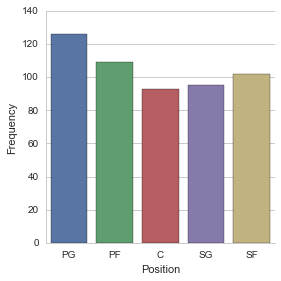

In [19]:
sns.factorplot(x="Position", y='Frequency',data=tt,kind='bar')

Note that there are 8 roster positions are: PG, SG, SF, PF, C, G, F, and UTIL. So, from the graph, choosing PG in the 'UTIL' slot can be more favorable. 

###What are most popular players to be selected in the winning Lineups?

In [20]:
def plot_most_selected_players(position,pastwinners):
    player_Count_df = pandas.DataFrame(pastwinners[['PlayerName']].groupby('PlayerName').size(),columns=["Count"]).reset_index()
    winningPlayersByPos = player_Count_df.merge(pastwinners[['PlayerName','Position']],how='inner',on='PlayerName')
    winningPlayersByPos.drop_duplicates(inplace=True)
    tmp = winningPlayersByPos[winningPlayersByPos.Position==position].sort_values('Count',ascending=False).head(15)
    g = sns.factorplot(x="PlayerName", y="Count", data=tmp, kind="bar",palette="Blues_d",size=5,aspect=2) 
    g.set_xticklabels(rotation=90)
    return(tmp)

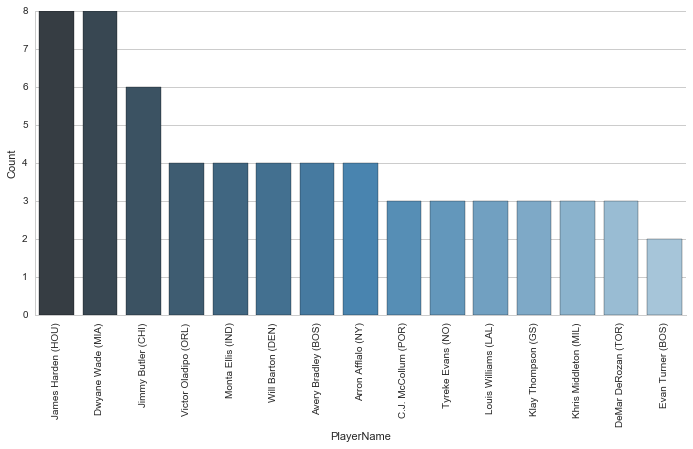

In [21]:
SG_players = plot_most_selected_players('SG',pastwinners)

In [22]:
SG_players.head()

,PlayerName,Count,Position
207,James Harden (HOU),8,SG
136,Dwyane Wade (MIA),8,SG
232,Jimmy Butler (CHI),6,SG
510,Victor Oladipo (ORL),4,SG
381,Monta Ellis (IND),4,SG


,PlayerName,Count,Position
243,John Wall (WSH),11,PG
71,Chris Paul (LAC),8,PG
317,Kyle Lowry (TOR),7,PG
471,Stephen Curry (GS),7,PG
265,Jrue Holiday (NO),6,PG
187,Isaiah Thomas (BOS),5,PG
370,Michael Carter-Williams (MIL),5,PG
282,Kemba Walker (CHA),5,PG
451,Russell Westbrook (OKC),5,PG
425,Rajon Rondo (SAC),4,PG


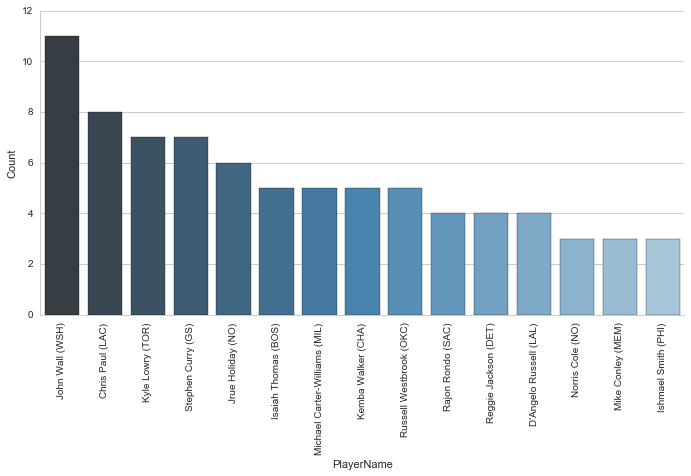

In [23]:
plot_most_selected_players('PG',pastwinners)

In [ ]:
We can give more weights to the 

### Pattern of the Fantasy Points and Salary cost for each game day

In [52]:
fpsc_df = pastwinners[['Salary','FP']].reset_index()

In [53]:
fpsc_df.head()

,Date,Salary,FP
0,11-17-15,8100,62
1,11-17-15,7700,50
2,11-17-15,7100,47
3,11-17-15,6400,46
4,11-17-15,6200,55


In [86]:
fpsc_grouped = fpsc_df.groupby('Date')
fpsc_team = fpsc_grouped.apply(lambda x: x[['Salary','FP']].apply(lambda y: y.sum()))
fpsc_team = fpsc_team.rename(columns={'Salary':'TotalSalary','FP':'TotalFanPTs'})

In [87]:
fpsc_team = fpsc_team.set_index(pandas.DatetimeIndex(fpsc_team.index))

In [88]:
fpsc_team.sort_index(inplace=True)

In [89]:
fpsc_team.head()

,TotalSalary,TotalFanPTs
2015-11-17,49900,377.00
2015-11-19,49700,330.75
2015-11-22,49200,375.25
2015-11-23,49000,386.00
2015-11-24,50000,351.50


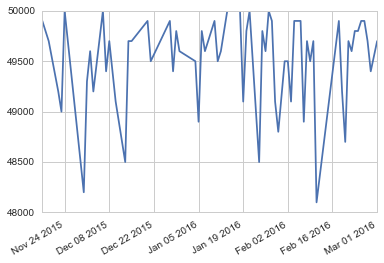

In [98]:
fpsc_team['TotalSalary'].plot()

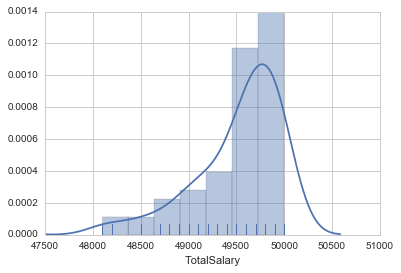

In [99]:
sns.distplot(fpsc_team['TotalSalary'], rug=True)

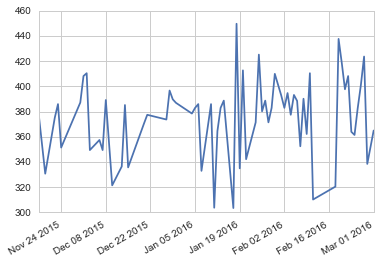

In [101]:
fpsc_team['TotalFanPTs'].plot()

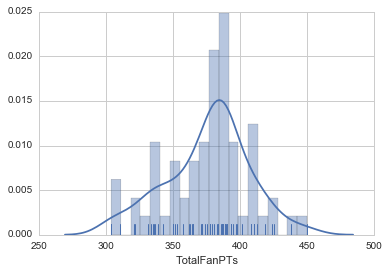

In [105]:
sns.distplot(fpsc_team['TotalFanPTs'],bins=20, rug=True)

We can see the in most cases, the winning Pantasy Points are around 370~400. Thus, we can test our algorithm, if we can optimize our lineup with total Pantasy Points 370~400, we can say we have high odds to be top winners. If we optimize our lineup with total Pantasy Points 340~370, we can say we are likely to be high-tier winners. If we optimize our lineup with total Pantasy Points 300~340, we can say we are likely to be seconde-tier winners. This will give us good sense to evaluate our system. 